# import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Load the Faces dataset:

In [5]:
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


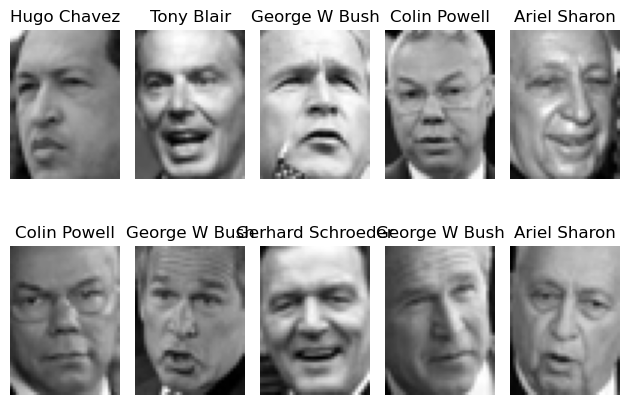

In [9]:
images = faces.images

for i in range(10):
    plt.subplot(2, 5, i + 1)   # 2 rows x 5 columns
    plt.imshow(images[i], cmap='gray')
    plt.title(faces.target_names[faces.target[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
X = faces.data
n_samples, n_features = X.shape

print(f"n_samples: {n_samples}\t n_features: {n_features}")

n_samples: 1288	 n_features: 1850


# Apply PCA for decomposition:

In [12]:
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)

# Visualize eigenfaces:

In [14]:
eigenfaces = pca.components_.reshape(
    (n_components, faces.images.shape[1], faces.images.shape[2]))

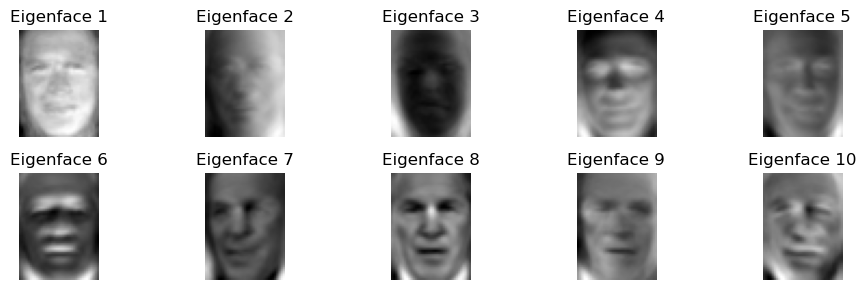

In [17]:
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"Eigenface {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

تصویر اول تاکید بیشتر روی گودی زیر چشم، زاویه فک و سپس حالت کلی صورت است
در دومی سمت چپ صورتی که چرخش دارد مورد تاکید است
در سومی خارج از صورت 
در چهارمی خوش چشمها
در ششمی ابروها
در هشتمی بین چشمها

# Reconstruct faces from principal components:

In [19]:
n_faces = 1
random_faces_indices = np.random.randint(0, n_samples, n_faces)
random_faces = X[random_faces_indices]

In [21]:
faces_pca = pca.transform(random_faces)

In [37]:
k20 = np.copy(faces_pca)
k20[:, 20:] = 0
k80 = np.copy(faces_pca)
k80[:, 80:] = 0
k150 = np.copy(faces_pca)

In [45]:
k20_reconstructed = pca.inverse_transform(k20)
k80_reconstructed = pca.inverse_transform(k80)
k150_reconstructed = pca.inverse_transform(k150)

In [51]:
faces_reconstructed = [k20_reconstructed, k80_reconstructed, k150_reconstructed]
titles = ['20', '80', '150']

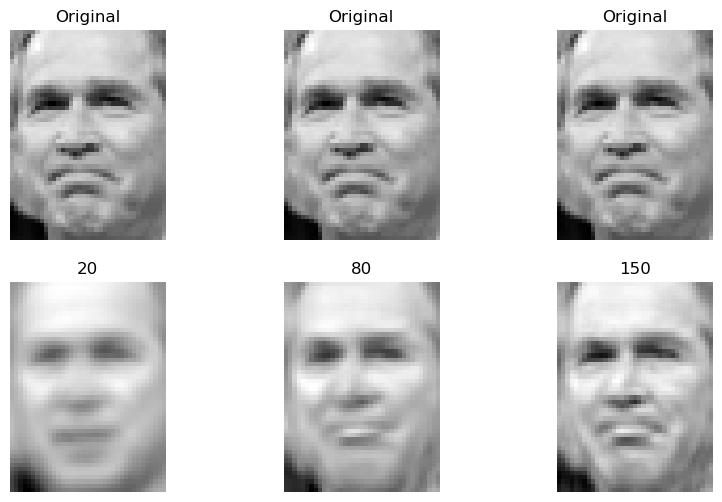

In [55]:
n_faces = 3
plt.figure(figsize=(10, 6))
for i in range(n_faces):
    plt.subplot(2, n_faces, i + 1)
    plt.imshow(random_faces.reshape(
        faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, n_faces, i + 1 + n_faces)
    plt.imshow(faces_reconstructed[i].reshape(
        faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

In [61]:
print(f"mse for k=20: {np.mean(np.square(random_faces - k20_reconstructed)) }")
print(f"mse for k=80: {np.mean(np.square(random_faces - k80_reconstructed)) }")
print(f"mse for k=150: {np.mean(np.square(random_faces - k150_reconstructed)) }")

mse for k=20: 0.004235880449414253
mse for k=80: 0.0019290187628939748
mse for k=150: 0.0009957731235772371
